In [15]:
from utils import *
from core import *

device = 'cuda'

In [16]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
rots = [0, 1, 10, 20, 30, 40, 50]

In [18]:
FILE_PATH = 'test_data/'
projections = torch.load(FILE_PATH + 'projections_scaled.pt')
recons = torch.load(FILE_PATH + 'recon_scaled.pt')
recons.shape, projections.shape

(torch.Size([179, 200, 200]), torch.Size([200, 200, 200]))

In [19]:
recons_filled = torch.zeros(200, 200, 200)
recons_filled[12:191, :, :] = recons

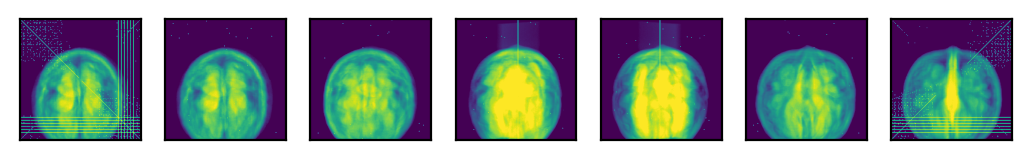

In [20]:
generated_sinograms = generate_sinogram(rots, vol_recon=recons_filled, file_path='../temp/matrix_200/')
plot_images_line(generated_sinograms)

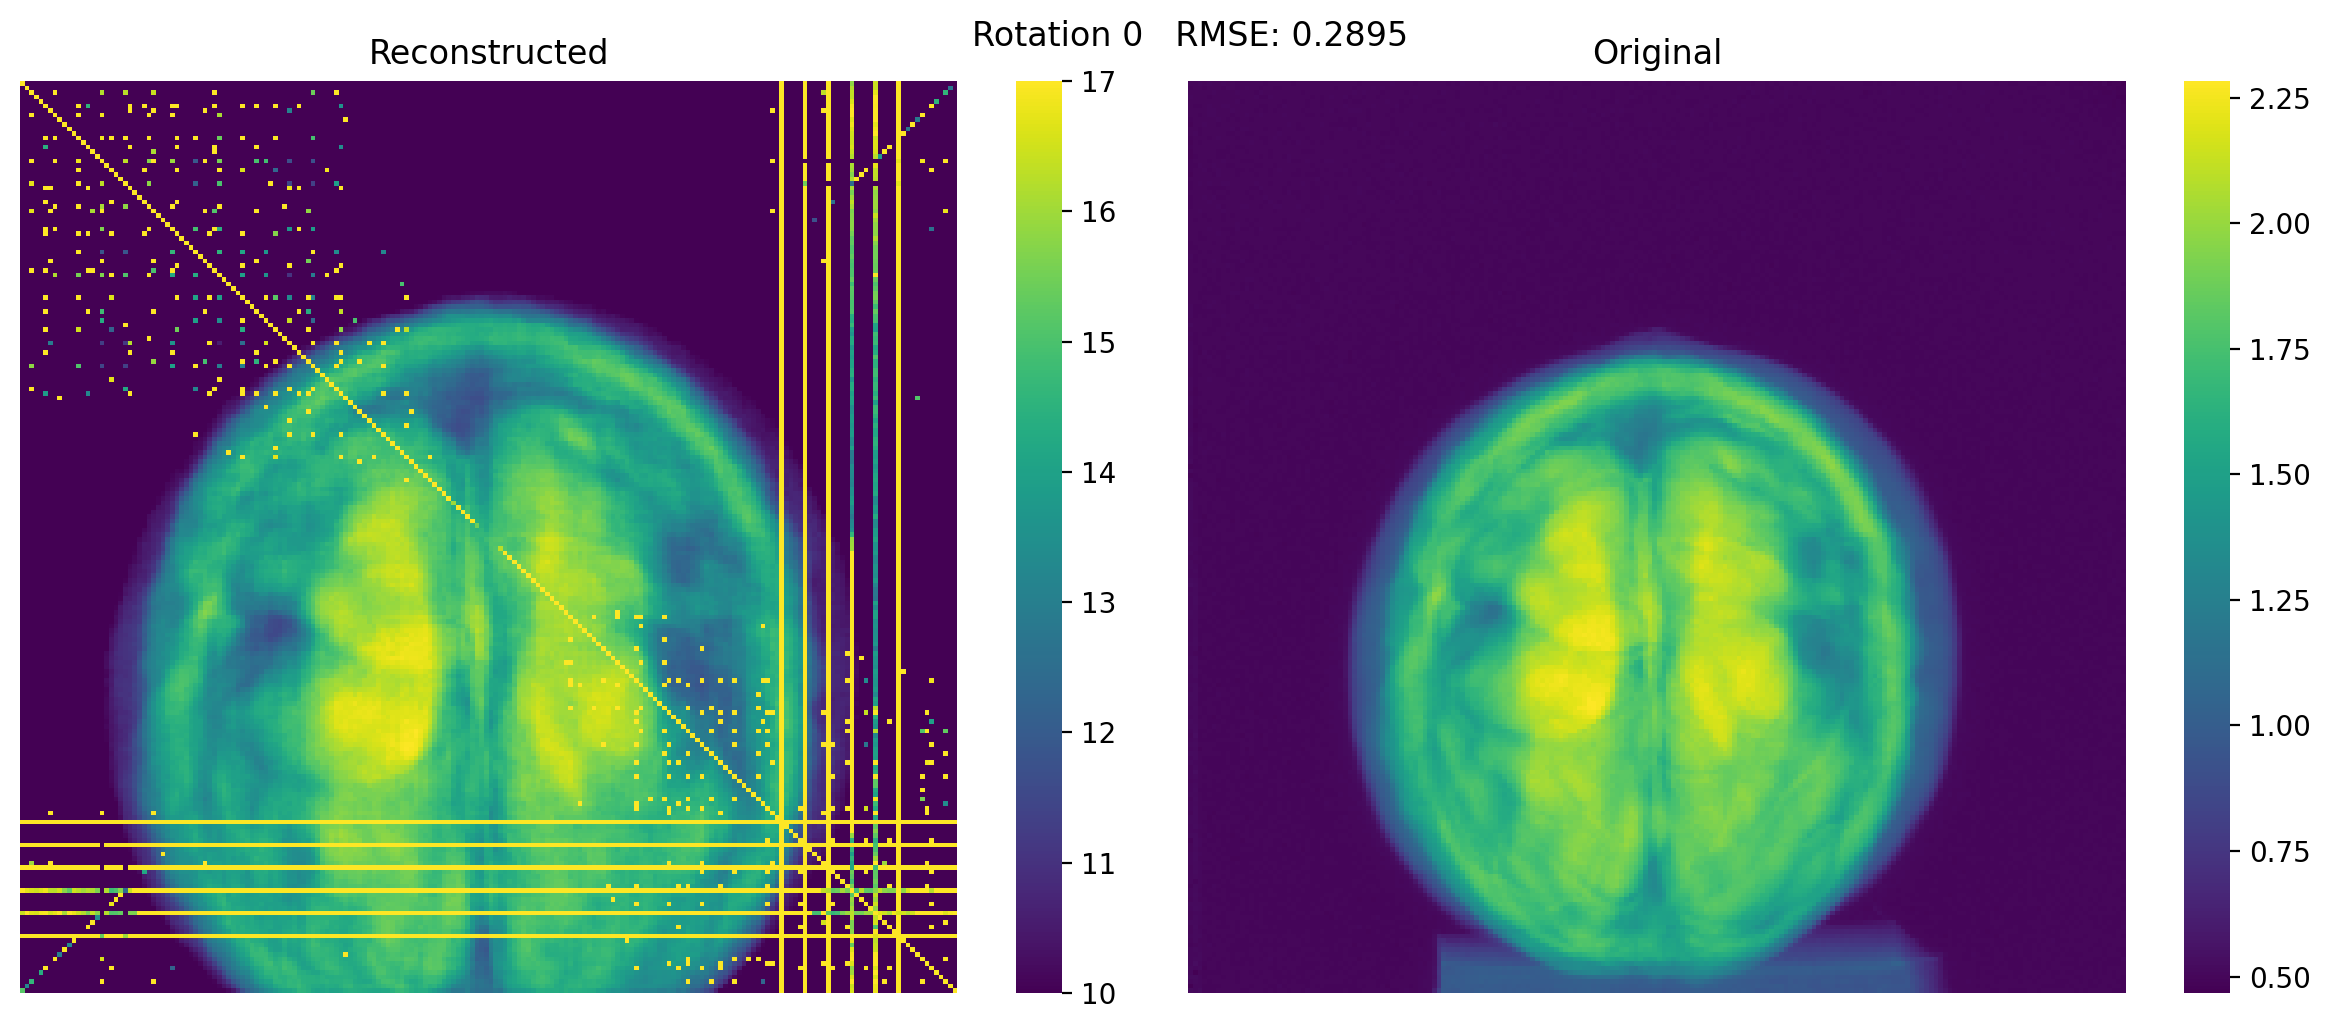

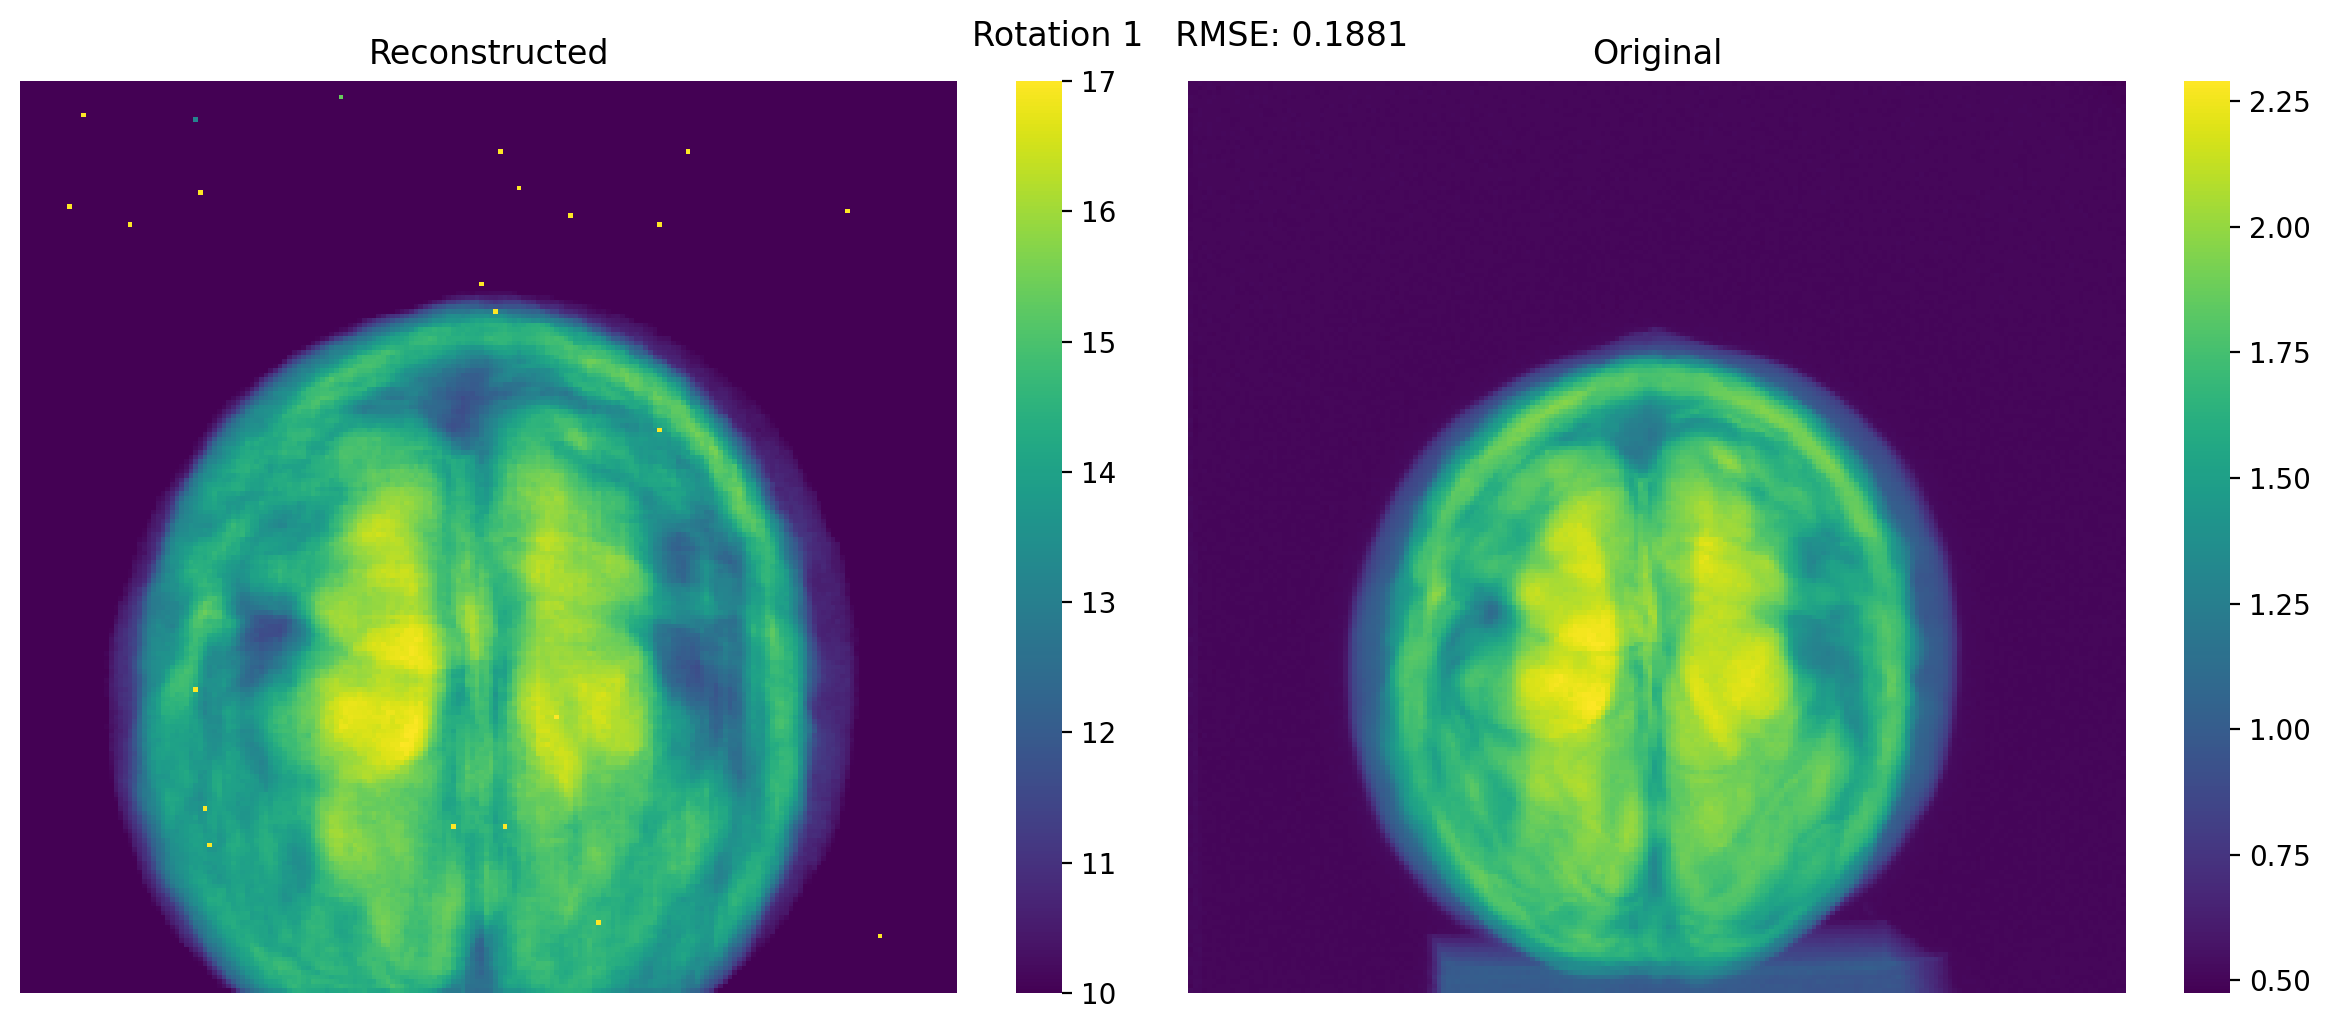

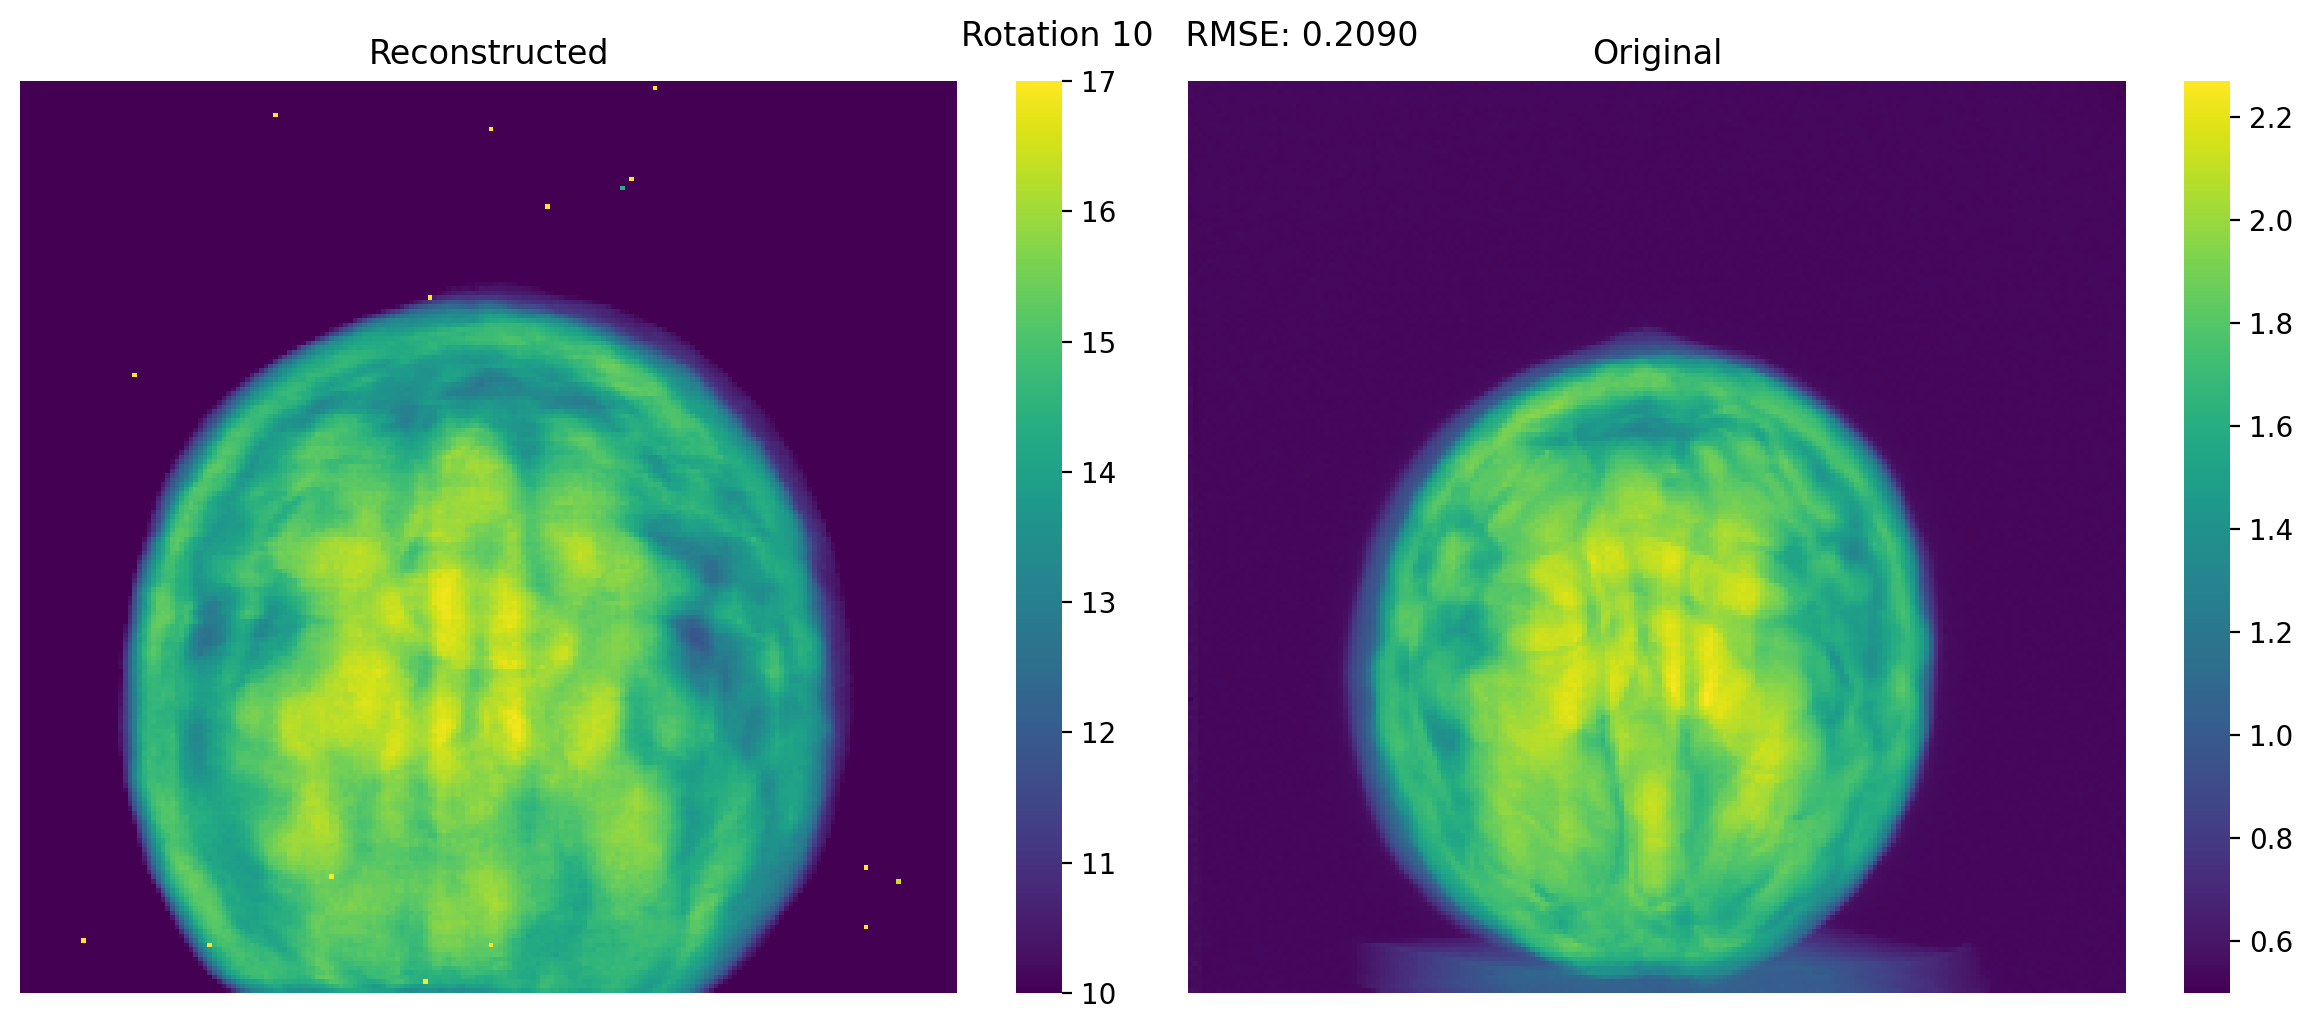

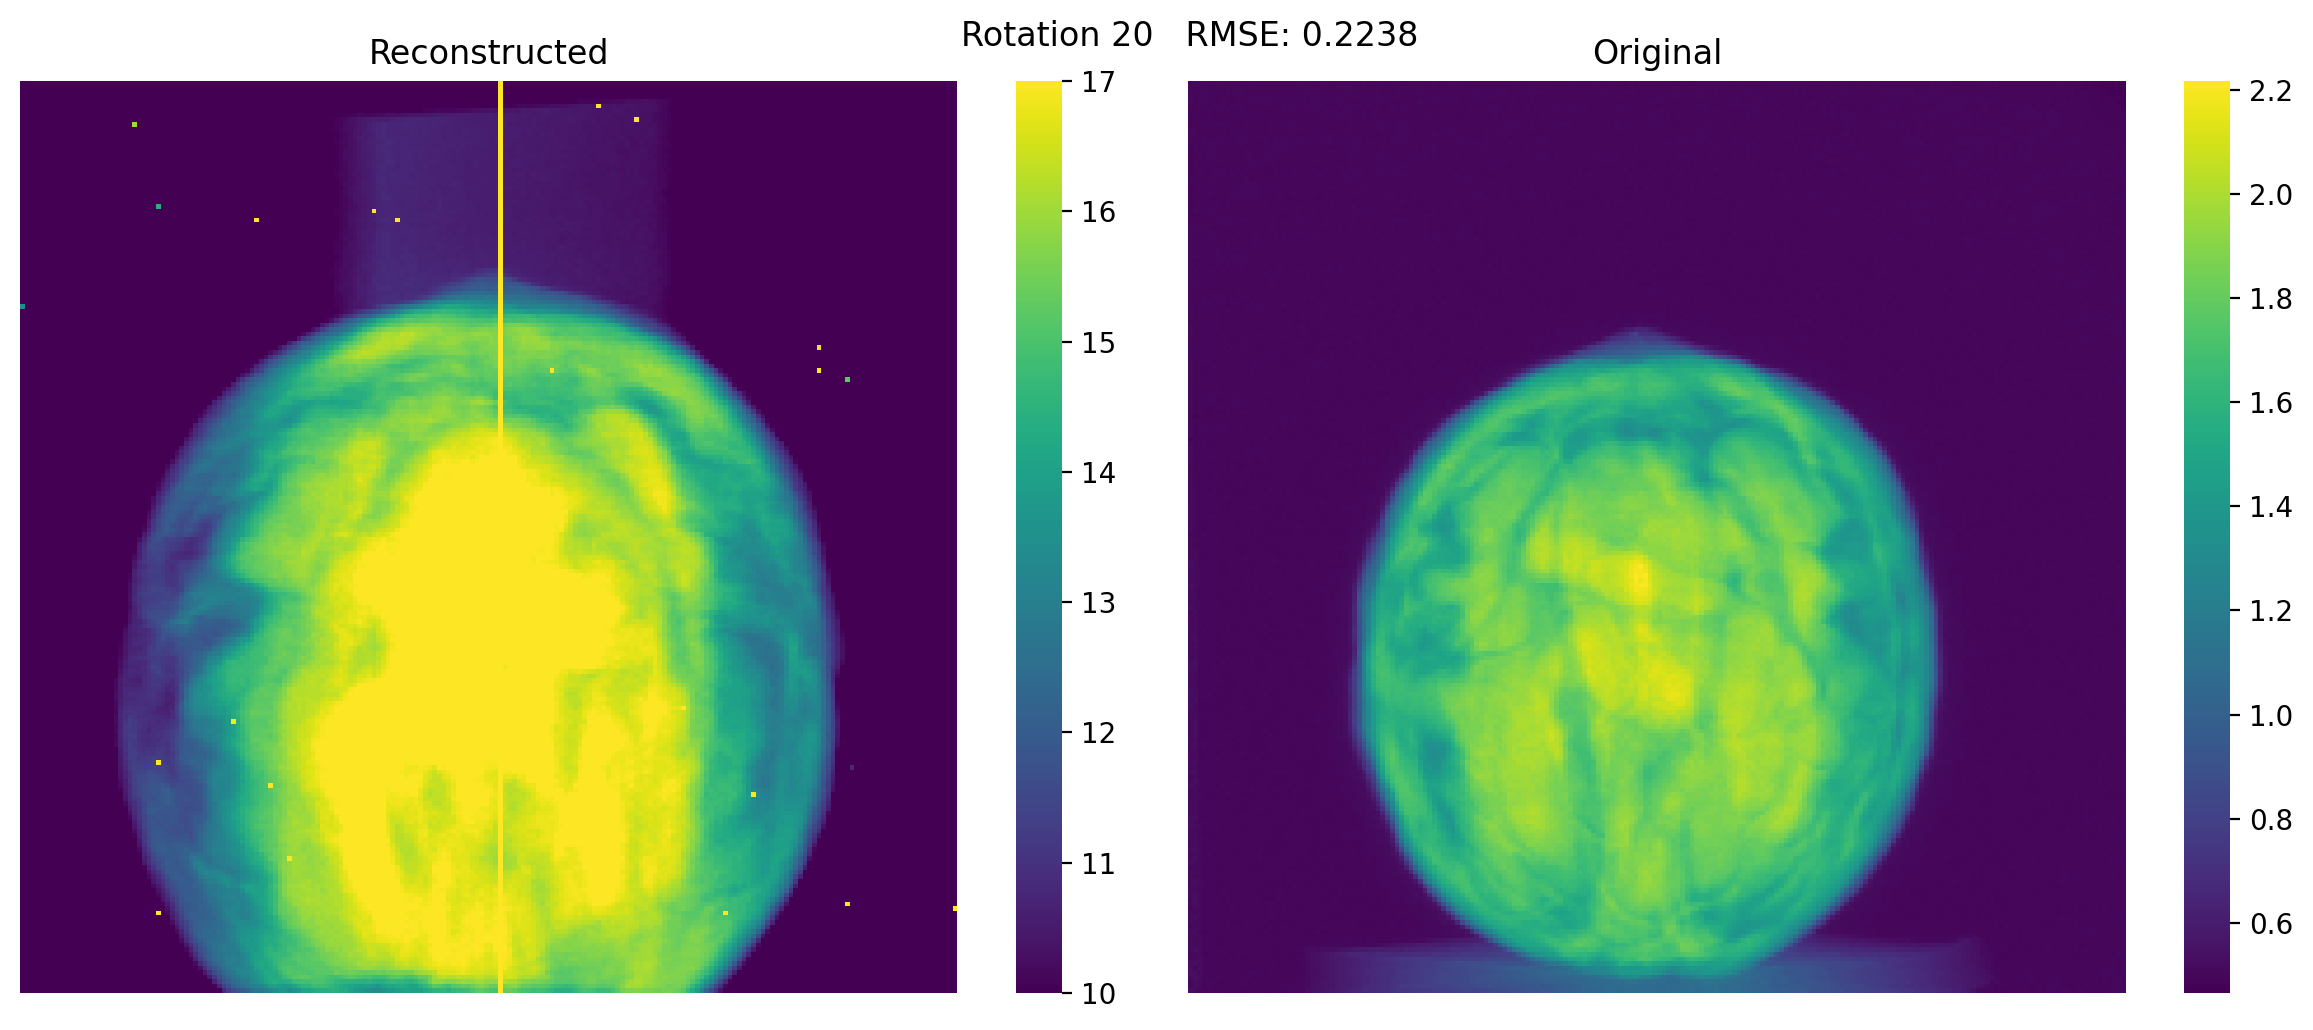

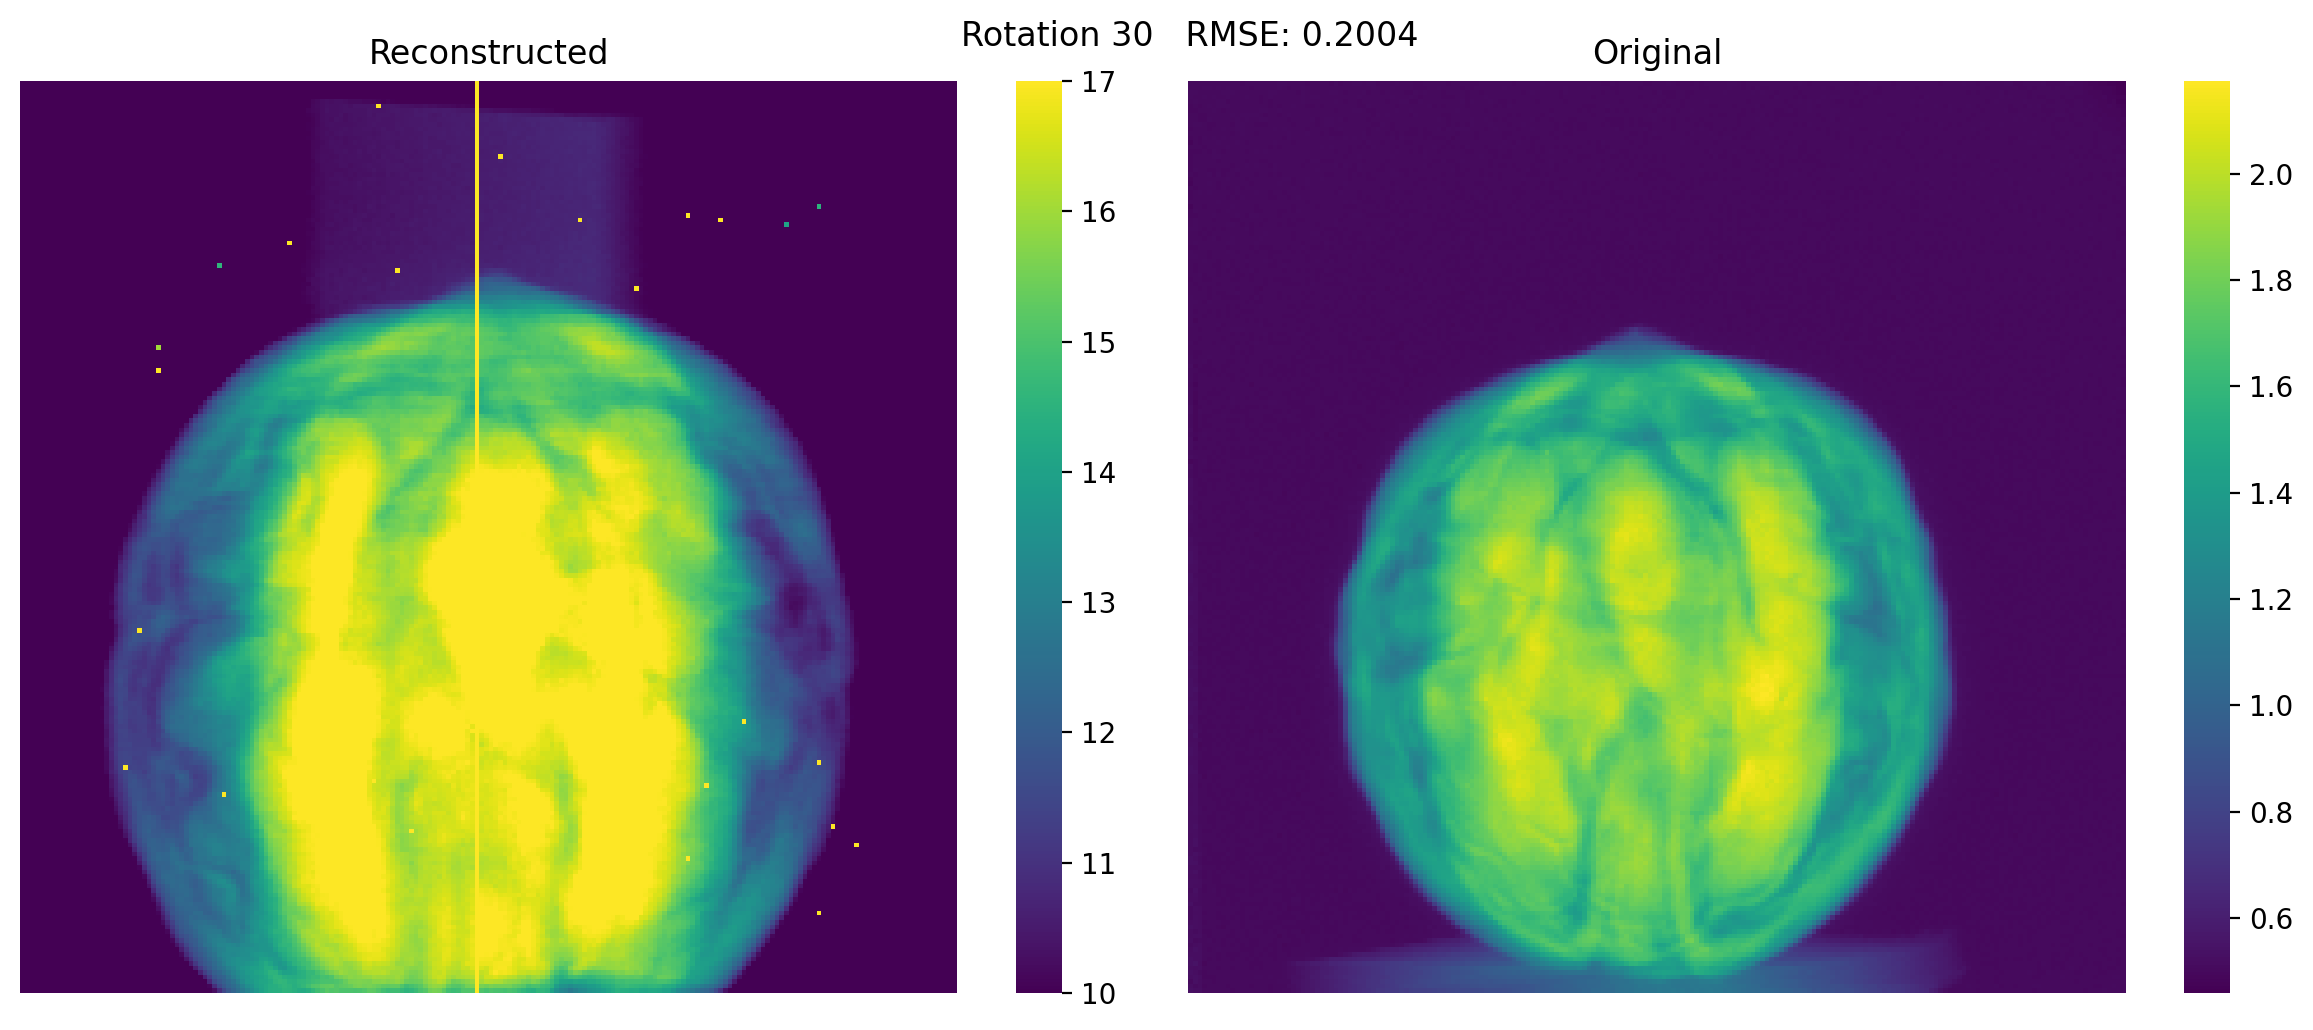

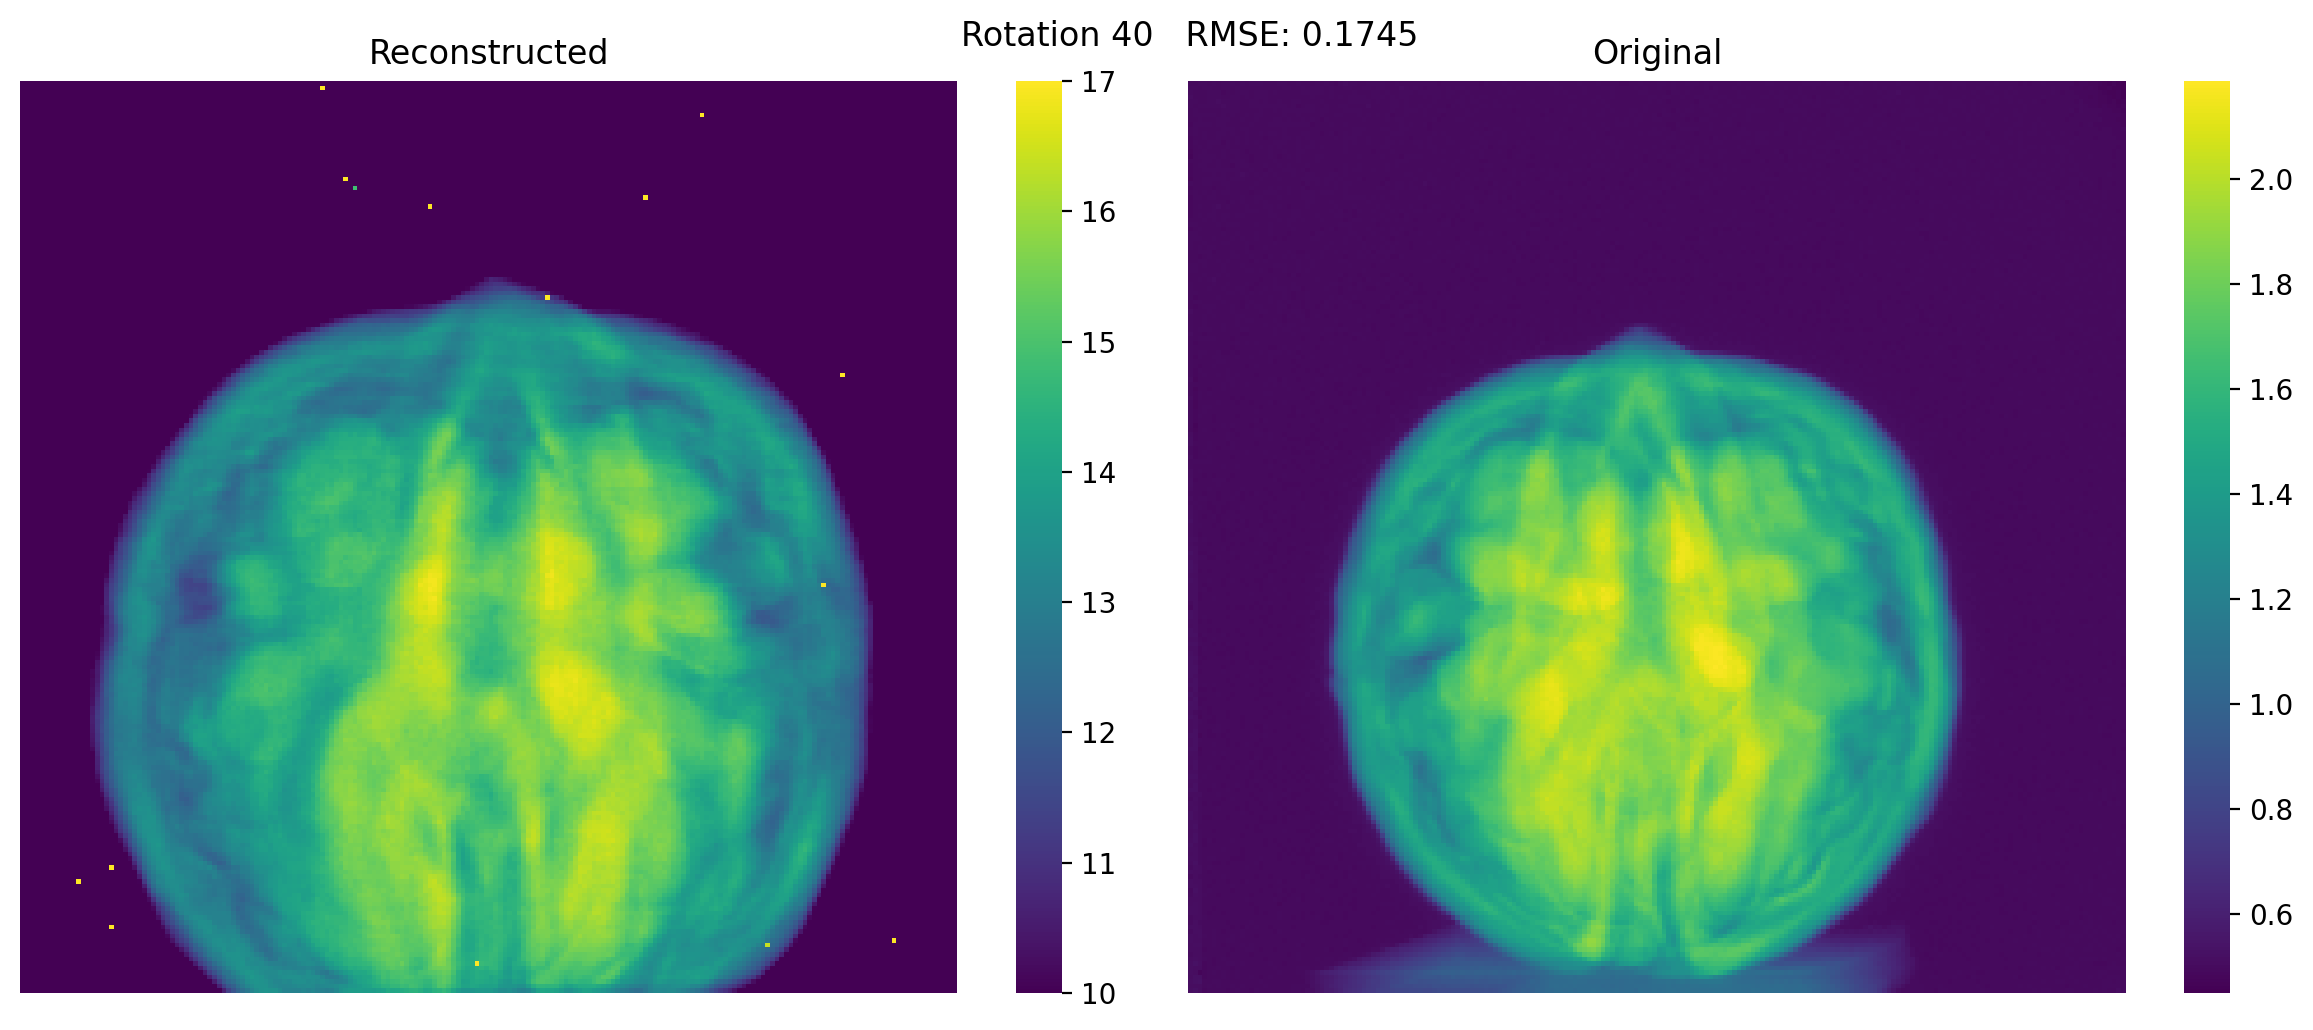

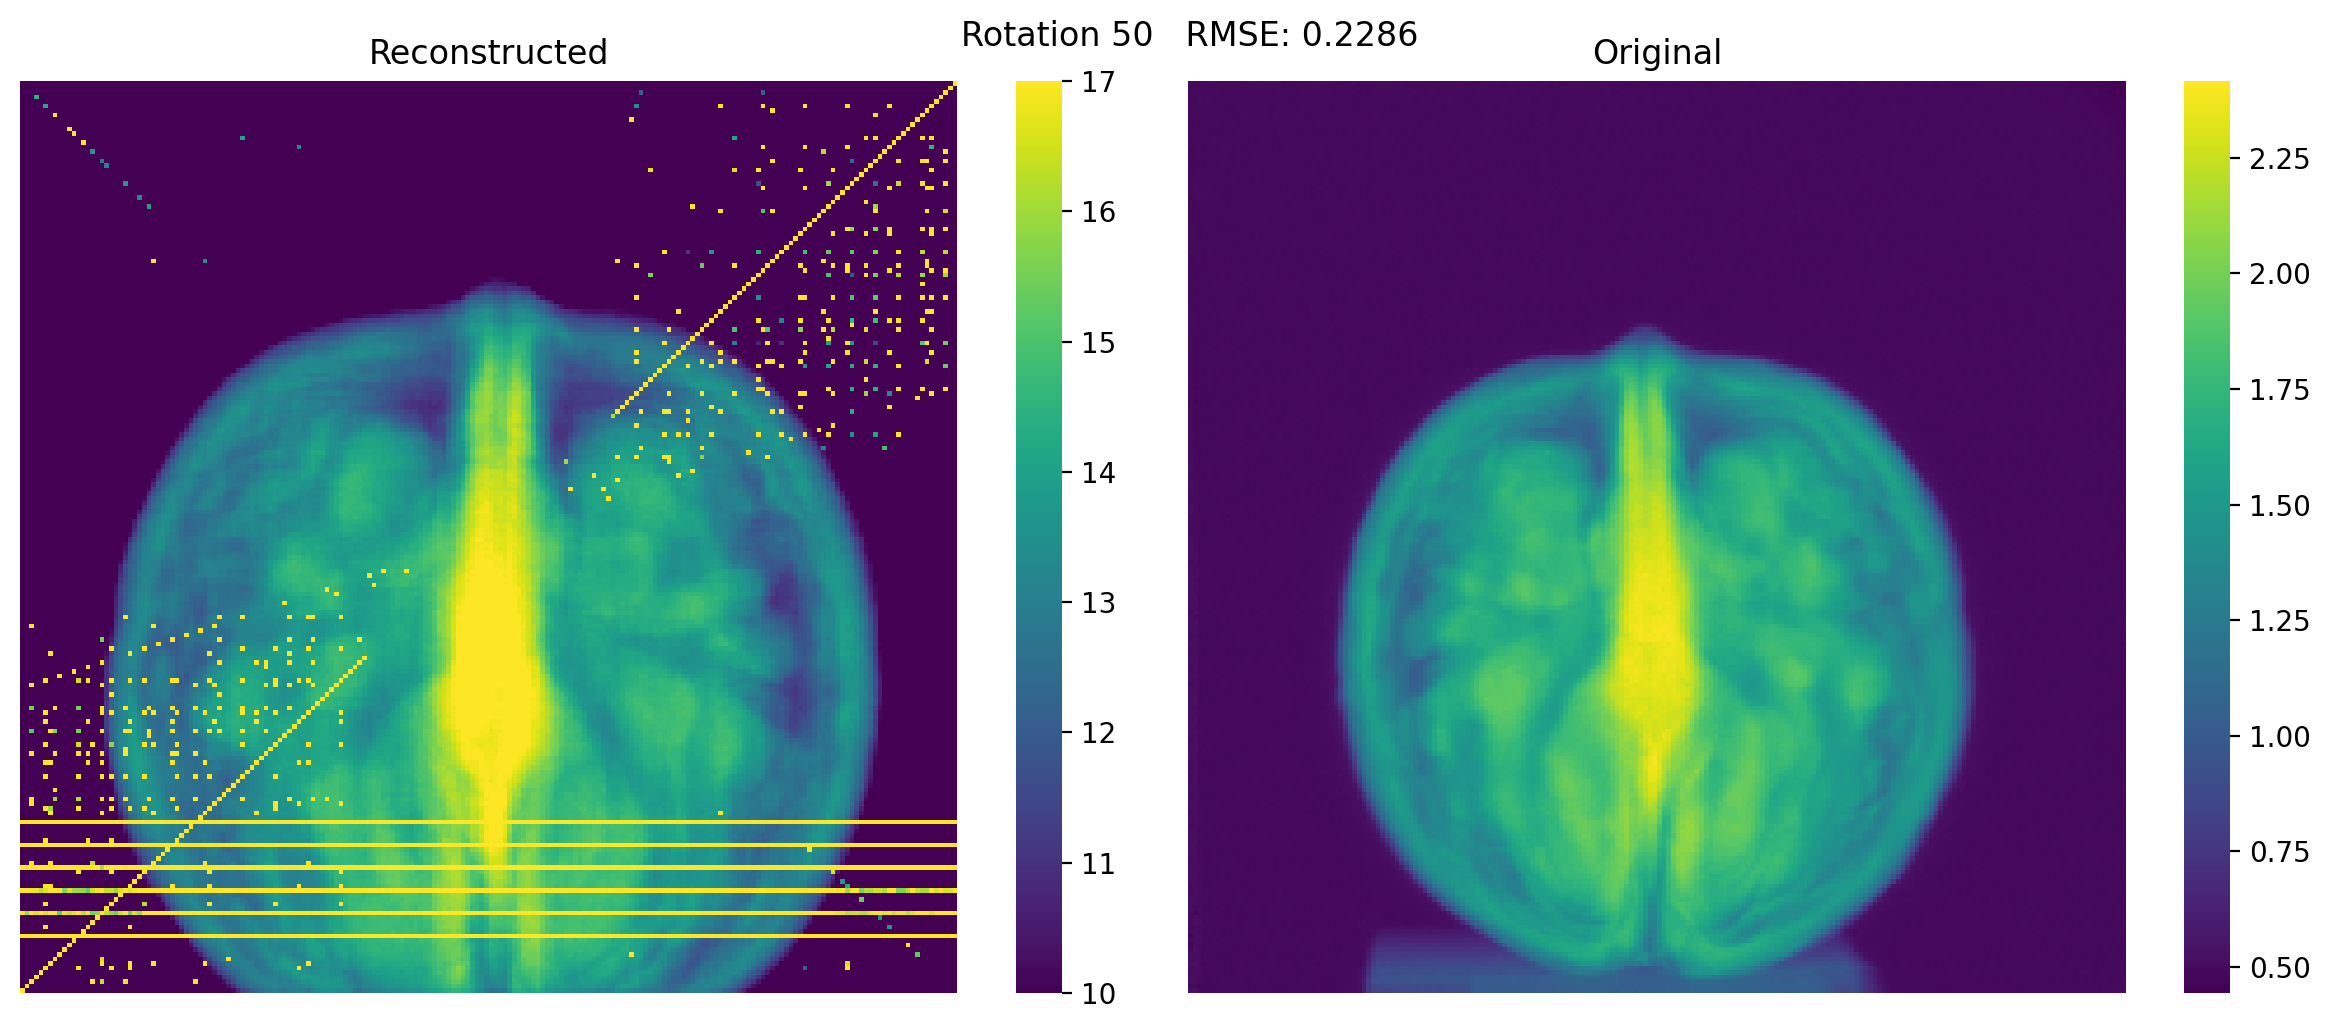

In [21]:
for i in range(len(rots)):
    plot_2d_comparison(generated_sinograms[i], projections[:, :, rots[i]], title=f'Rotation {rots[i]}   ')